In [1]:
import tensorflow
import numpy as np

In [2]:
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Normalize
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

In [5]:
# Add channel dimension
X_train = np.expand_dims(X_train, -1)  # (60000,28,28,1)
X_test  = np.expand_dims(X_test, -1)   # (10000,28,28,1)

In [6]:
# Pad to 32x32 (mnist images are 28x28 but the original LeNet-5 used 32x32)
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test  = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [7]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# C5 (Conv with 120 filters of size 5x5 → outputs 1x1x120)
model.add(Conv2D(120, kernel_size=5, activation='tanh'))

model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.8398 - loss: 0.5965 - val_accuracy: 0.9553 - val_loss: 0.1498
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9584 - loss: 0.1366 - val_accuracy: 0.9691 - val_loss: 0.0956
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9736 - loss: 0.0863 - val_accuracy: 0.9786 - val_loss: 0.0715
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9799 - loss: 0.0661 - val_accuracy: 0.9806 - val_loss: 0.0617
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9845 - loss: 0.0509 - val_accuracy: 0.9815 - val_loss: 0.0587
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.9839 - val_loss: 0.0482
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9896 - loss: 0.0332 - val_accuracy: 0.9857 - val_loss: 0.0455
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9915 - loss: 0.0275 - 

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 98.62%


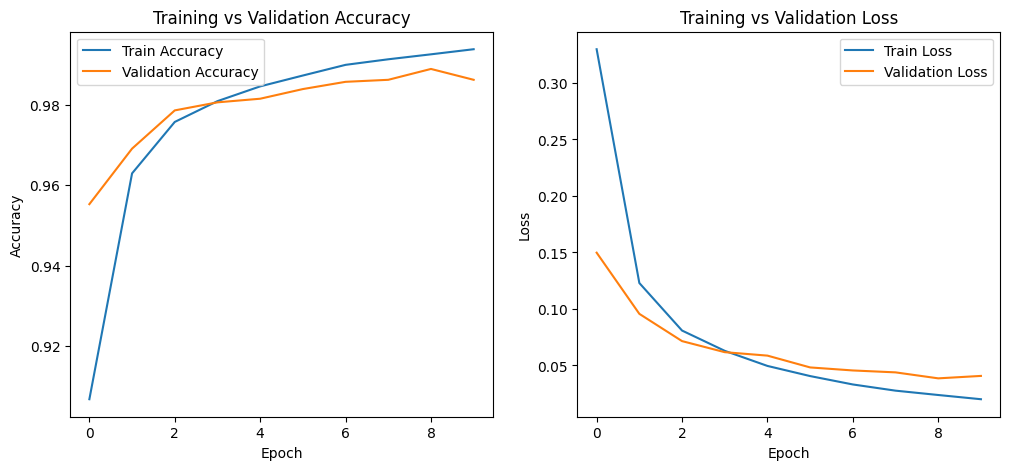

In [12]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


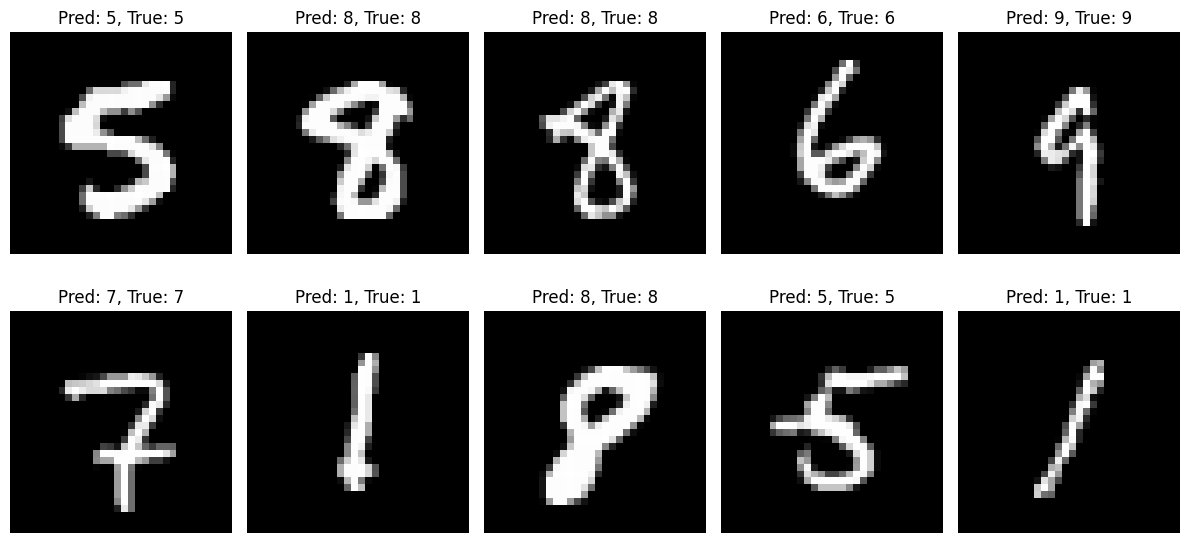

In [13]:
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Show some test images with predicted labels
plt.figure(figsize=(12,6))
for i in range(10):
    idx = np.random.randint(0, X_test.shape[0])
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(32,32), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[idx]}, True: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


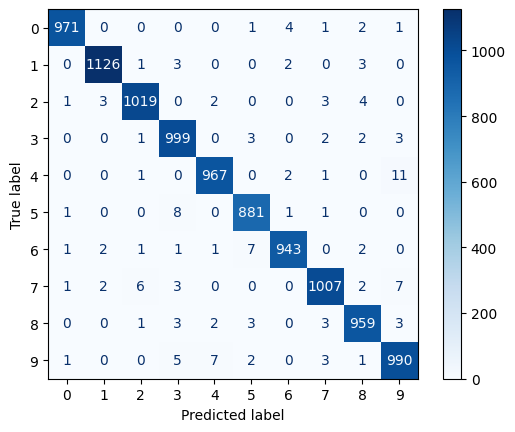

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()